# **Load the the GitHub Repo**

In [6]:
!git clone https://github.com/nipponjo/deepfillv2-pytorch.git

Cloning into 'deepfillv2-pytorch'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 195 (delta 36), reused 115 (delta 20), pack-reused 57 (from 1)
Receiving objects: 100% (195/195), 3.42 MiB | 15.61 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
%cd /kaggle/working/deepfillv2-pytorch

# **Create Image Mask**

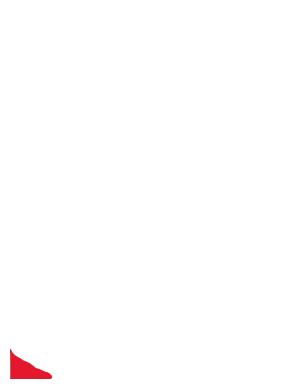

'/kaggle/working/mask.png'

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread('/kaggle/input/redmask/image.png')

# Convert to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV
lower_red1 = np.array([0, 120, 70])  # Lower bound for red in HSV
upper_red1 = np.array([10, 255, 255])  # Upper bound for red in HSV

lower_red2 = np.array([170, 120, 70])  # Another red range (for the other part of red color)
upper_red2 = np.array([180, 255, 255])

# Create masks for both ranges of red
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)

# Combine the two masks
mask = cv2.bitwise_or(mask1, mask2)

# Create a 4-channel (RGBA) image (the 4th channel is for alpha transparency)
b, g, r = cv2.split(image)  # Split the original image into Blue, Green, and Red channels
alpha = mask  # Use the red mask for transparency (255 means opaque, 0 means transparent)

# Merge the channels back into a 4-channel image
rgba_image = cv2.merge([b, g, r, alpha])

# Save the result as a PNG image with transparency in the /kaggle/working/ directory
output_path = '/kaggle/working/mask.png'
cv2.imwrite(output_path, rgba_image)

# Optionally display the image using matplotlib
plt.imshow(cv2.cvtColor(rgba_image, cv2.COLOR_BGRA2RGBA))
plt.axis('off')  # Turn off axis
plt.show()

# Output path for reference
output_path


# **Image Resize for the Model**

In [78]:
from PIL import Image

# Load the image (assuming it's a .jpg file)
image = Image.open('/kaggle/input/imagee/scan0003.jpg')
image = image.resize((1200, 1500))  # Resize to a lower resolution

# Convert and save as .png
image.save('/kaggle/working/scan00033_resized.png', 'PNG')  # Save as PNG format

# Optionally, load another image (e.g., mask) and resize it similarly
mask = Image.open('/kaggle/input/redmask/image.png')
mask = mask.resize((1200, 1500))  # Resize to a lower resolution

# Save the resized mask as a .png image (to preserve transparency)
mask.save('/kaggle/working/mask_resized.png', 'PNG')  # Saving as PNG


# **Run the Model**

In [79]:
!python test.py --image /kaggle/working/scan00033_resized.png --mask /kaggle/working/mask_resized.png --out /kaggle/working/output_image.png --checkpoint /kaggle/input/states-pt-places2/states_pt_places2.pth

/kaggle/working/deepfillv2-pytorch/test.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator_state_dict = torch.load(args.checkpoint)['G']
/kaggle/working/deepfill

# **Show and Resize the Output**

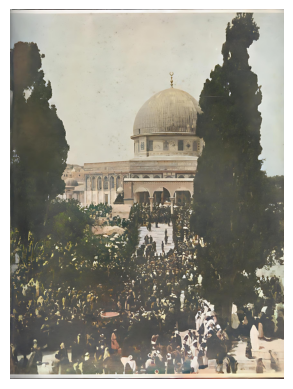

In [86]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the output image
img_out = Image.open('/kaggle/working/output_image.png')

# Load the original image to get its original size
original_image = Image.open('/kaggle/input/imagee/scan0003.jpg')  
original_size = original_image.size  # (width, height)

# Resize the output image to the original size
img_out_resized = img_out.resize(original_size)

# Display the resized image
plt.imshow(img_out_resized)
plt.axis('off')  # Hide the axis
plt.show()
